In [1]:
import os 
os.getcwd()

'C:\\Users\\siddh'

In [2]:
os.chdir("C:/Users/siddh/OneDrive/Desktop/Data sets")

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
df1=pd.read_csv("challenger.csv")

In [4]:
df1

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


In [5]:
O_ring_failures=df1['O.ring.failures']

In [6]:
O_ring_failures

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    2
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
Name: O.ring.failures, dtype: int64

In [7]:
temp=df1['temperature']

In [8]:
temp

0     66
1     70
2     69
3     68
4     67
5     72
6     73
7     70
8     57
9     63
10    70
11    78
12    67
13    53
14    67
15    75
16    70
17    81
18    76
19    79
20    75
21    76
22    58
Name: temperature, dtype: int64

Text(0.5, 0, 'Temperature')

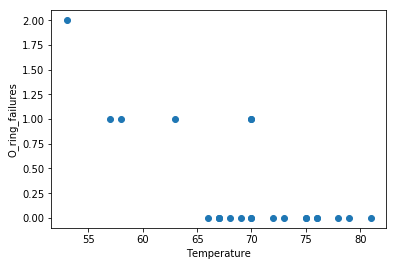

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
ax=plt.plot(temp,O_ring_failures,'o')
plt.ylabel("O_ring_failures")
plt.xlabel("Temperature")

# Null hypothesis is neagative value ,alternative hypothesis there is a relation between two assumptions 
 

In [10]:
df1.corr()

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
o_ring_ct,NaN,NaN,NaN,NaN,NaN
O.ring.failures,NaN,1.000000,-0.725671,0.220326,-0.011993
temperature,NaN,-0.725671,1.000000,0.039818,0.230770
pressure,NaN,0.220326,0.039818,1.000000,0.839932
launch_id,NaN,-0.011993,0.230770,0.839932,1.000000


In [11]:
mean_O_ring_failures=df1['O.ring.failures'].mean()

In [12]:
mean_O_ring_failures

0.30434782608695654

<function matplotlib.pyplot.show(*args, **kw)>

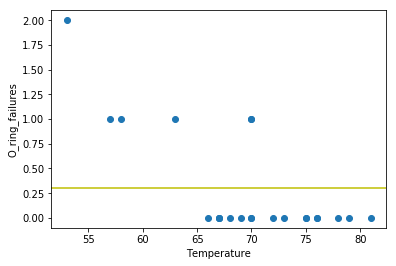

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
ax=plt.plot(temp,O_ring_failures,'o')
plt.ylabel("O_ring_failures")
plt.xlabel("Temperature")
plt.axhline(mean_O_ring_failures,color='y',linestyle='-')
plt.show


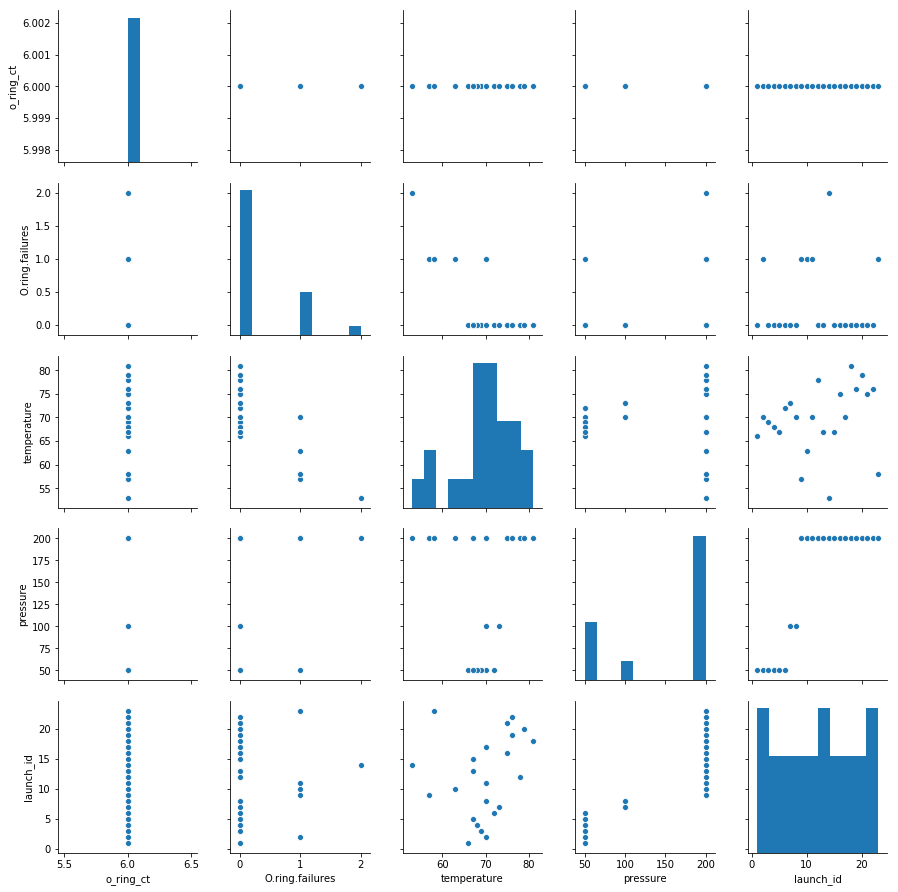

In [14]:
import seaborn as sns
sns.pairplot(df1)

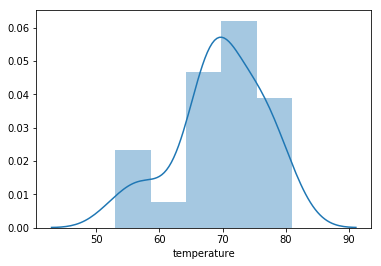

In [15]:
sns.distplot(df1['temperature'])

# temeperature values are approximatley distributed 

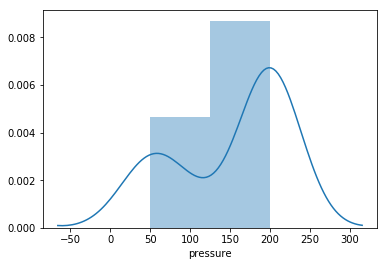

In [16]:
sns.distplot(df1['pressure'])

# it is partialy normaly distributed 

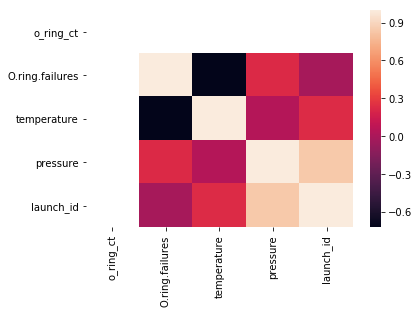

In [17]:
corr=df1.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [18]:
import statsmodels.api as sm
model1=sm.OLS(O_ring_failures,temp).fit()

In [19]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        O.ring.failures   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     4.755
Date:                Tue, 14 May 2019   Prob (F-statistic):             0.0402
Time:                        10:32:41   Log-Likelihood:                -19.595
No. Observations:                  23   AIC:                             41.19
Df Residuals:                      22   BIC:                             42.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature     0.0038      0.002      2.181      0.040       0.000       0.007
==============================================================================
Omnibus:                       14.053   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.853
Skew:                           1.623   Prob(JB):                      0.00162
Kurtosis:                       4.696   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# when temperature increase no of orings fail is 0.0038 which is close to 0  when temperature increase 1 degree no orings fail is 0

In [21]:
pressure=df1['pressure']

In [22]:
model2=sm.OLS(O_ring_failures,pressure).fit()

In [23]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        O.ring.failures   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     8.278
Date:                Tue, 14 May 2019   Prob (F-statistic):            0.00875
Time:                        10:32:41   Log-Likelihood:                -18.173
No. Observations:                  23   AIC:                             38.35
Df Residuals:                      22   BIC:                             39.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pressure       0.0020      0.001      2.877      0.009       0.001       0.003
==============================================================================
Omnibus:                       11.553   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.660
Skew:                           1.447   Prob(JB):                      0.00799
Kurtosis:                       4.306   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# both temperature and pressure are affecting (stastistical) , when pressure increse by one atmosphere no of orings fail is 0.0028 (pressure coefficient )

In [25]:
X=df1['temperature']
y=df1['O.ring.failures']

In [26]:
# split the data into trianing and test
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)

In [28]:
X_train

6     73
7     70
1     70
14    67
0     66
15    75
22    58
21    76
9     63
8     57
12    67
11    78
5     72
Name: temperature, dtype: int64

In [29]:
X_test

20    75
17    81
3     68
13    53
19    79
16    70
10    70
4     67
2     69
18    76
Name: temperature, dtype: int64

In [30]:
y_train

6     0
7     0
1     1
14    0
0     0
15    0
22    1
21    0
9     1
8     1
12    0
11    0
5     0
Name: O.ring.failures, dtype: int64

In [31]:
y_test

20    0
17    0
3     0
13    2
19    0
16    0
10    1
4     0
2     0
18    0
Name: O.ring.failures, dtype: int64

In [32]:
X_train =X_train.values.reshape((-1,1))

In [33]:
X_train

array([[73],
       [70],
       [70],
       [67],
       [66],
       [75],
       [58],
       [76],
       [63],
       [57],
       [67],
       [78],
       [72]], dtype=int64)

# Linear regression with sklearn 

In [34]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X_train,y_train)

In [35]:
accuracy=model.score(X_train,y_train)
print('Accuracy of the model:',accuracy)

Accuracy of the model: 0.49669252207783493


In [36]:
#print coefficients 
print('intercept:',model.intercept_)
print('slope:',model.coef_)

intercept: 3.874282260501663
slope: [-0.05197945]


In [37]:
#the slope value=-0.051 means that the predicted oring failures  reduces by =-0.005 when x(temperature) rises by one degree

In [39]:
X_test=X_test.values.reshape((-1,1))

In [40]:
X_test

array([[75],
       [81],
       [68],
       [53],
       [79],
       [70],
       [70],
       [67],
       [69],
       [76]], dtype=int64)

In [42]:
#Predictiond from the model
predictions=model.predict(X_test)
print('predicted O.ring.failures:',predictions,sep='\n')

predicted O.ring.failures:
[-0.02417649 -0.33605319  0.33967966  1.11937141 -0.23209429  0.23572076
  0.23572076  0.39165911  0.28770021 -0.07615594]


In [43]:
y_test

20    0
17    0
3     0
13    2
19    0
16    0
10    1
4     0
2     0
18    0
Name: O.ring.failures, dtype: int64

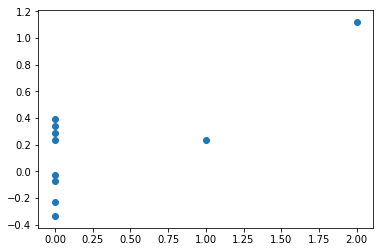

In [44]:
plt.scatter(y_test,predictions)

In [45]:
Xnew=[[30]]
ynew=model.predict(Xnew)

In [46]:
ynew

array([2.31489876])

In [47]:
Xnew=[[15]]
ynew=model.predict(Xnew)

In [48]:
ynew

array([3.09459051])

In [51]:
Xnew=[[70]]
ynew=model.predict(Xnew)

In [52]:
ynew

array([0.23572076])

In [53]:
X=df1[['temperature','pressure']]

In [55]:
X

,temperature,pressure
0,66,50
1,70,50
2,69,50
3,68,50
4,67,50
5,72,50
6,73,100
7,70,100
8,57,200
9,63,200
